# Setting up the necessary packages  

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import harmonypy as hm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

2024-01-16 09:22:36.311567: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-16 09:22:36.315475: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-16 09:22:36.356800: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-16 09:22:36.357653: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-16 09:22:38.871878: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [ ]:
from matplotlib.pyplot import rc_context

In [ ]:
%matplotlib inline
sc.set_figure_params(dpi=300)

import seaborn as sns
sns.set(style="whitegrid")
%load_ext rpy2.ipython

In [ ]:
%%R
#loading packages
options(scipen=999)
library(vroom)
library(reshape2)
library(ComplexHeatmap)
library(circlize)
library(viridis)
library(colorspace)
library(RColorBrewer)
library(dplyr)
library(DESeq2)
library(plyr)
library(tidyr)
library(igraph)
library(tidyverse)
library(ggrepel)
library(ggplot2)
library(data.table)

R[write to console]: Loading required package: grid

R[write to console]: ========================================
ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


R[write to console]: ========================================
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

I

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.2     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%--%()        masks igraph::%--%()
✖ lubridate::%within%()    masks IRanges::%within%()
✖ plyr::arrange()          masks dplyr::arrange()
✖ tibble::as_data_frame()  masks igraph::as_data_frame(), dplyr::as_data_frame()
✖ readr::col_character()   masks vroom::col_character()
✖ readr::col_date()        masks vroom::col_date()
✖ readr::col_datetime()    masks vroom::col_datetime()
✖ readr::col_double()      masks vroom::col_double()
✖ readr::col_factor()      masks vroom::col_factor()
✖ readr::col_guess()       masks vroom::col_guess()
✖ readr::col_integer()     masks vroom::col_integer()
✖ readr::col_logical()     masks vroom::col_logical()
✖ readr::col_number()      masks vr

R[write to console]: data.table 1.14.8 using 32 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: 
Attaching package: ‘data.table’


R[write to console]: The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


R[write to console]: The following object is masked from ‘package:purrr’:

    transpose


R[write to console]: The following object is masked from ‘package:SummarizedExperiment’:

    shift


R[write to console]: The following object is masked from ‘package:GenomicRanges’:

    shift


R[write to console]: The following object is masked from ‘package:IRanges’:

    shift


R[write to console]: The following objects are masked from ‘package:S4Vectors’:

    first, second


R[write to console]: The following objects are masked from ‘package:dplyr’:

    between, first, last


R[write to console]: The following objects are masked from ‘package:reshape2’:

    dca

# Loading the necessary custom code  

In [ ]:
%%R

sourceFolder <- function(folder, recursive = FALSE, ...)
{
    files <- list.files(folder, pattern = "[.][rR]$",
                        full.names = TRUE, recursive = recursive)
    if (!length(files))
        stop(simpleError(sprintf('No R files in folder "%s"', folder)))
    src <- invisible(lapply(files, source, ...))
    message(sprintf('%s files sourced from folder "%s"', length(src), folder))
}

sourceFolder(
  "$PATH/projects/dev/comparABle/code/functions/", # change for definitive path once its final
  recursive = TRUE
  )
source('$PATH/projects/pristina/pristina_transcriptomic_landscape/code/R_functions/TF_analysis_functions/barplotcluster.R')

R[write to console]: 8 files sourced from folder "/mnt/sda/alberto/projects/dev/comparABle/code/functions/"

R[write to console]: Loading required package: permute

R[write to console]: 
Attaching package: ‘permute’


R[write to console]: The following object is masked from ‘package:igraph’:

    permute


R[write to console]: Loading required package: lattice

R[write to console]: This is vegan 2.6-4

R[write to console]: 
Attaching package: ‘vegan’


R[write to console]: The following object is masked from ‘package:igraph’:

    diversity


R[write to console]: 
Attaching package: ‘cowplot’


R[write to console]: The following object is masked from ‘package:lubridate’:

    stamp




# Data Load

In [ ]:
%%R
fcha <- function(){ gsub("-","",Sys.Date()) }
#Loading the objects saved in the last session
load('../hydractinia/wgcna/20230817_data_load.rda')

#Load the list of curated annotations for hydractinia and the cpms
hysim_tfs <- read.table('../interpro_diamond_blast/hydractinia_only/20230725_hydractinia_TFs_curated.tsv',
                       header=T)[,1:2]
head(hysim_tfs)

            id       class
1 LOC130612065 Homeodomain
2 LOC130612084         ETS
3 LOC130612125         MYB
4 LOC130612189     zf_C2H2
5 LOC130612234         MYB
6 LOC130612244     zf_C2H2


In [ ]:
%%R
dim(hysim_tfs)

[1] 210   2


In [ ]:
%%R
colnames(hysim_cpm)[1:38]

 [1] "04_prog_early"     "08_prog_mixed"     "14_prog_i-cell"   
 [4] "06_gmt_1"          "34_gmt_2"          "00_ep_1"          
 [7] "01_ep_2"           "07_ep_3"           "19_ep_4"          
[10] "23_ep_5"           "28_ep_6"           "30_ep_7"          
[13] "35_ep_8"           "37_ep_9"           "09_Cdpi2+"        
[16] "13_Cdpi3+"         "36_Cdpi1+"         "02_em_1"          
[19] "03_em_2"           "05_em_3"           "11_em_Shem+"      
[22] "20_em_4"           "31_em_5"           "21_gl_Rsp+"       
[25] "17_gl_Nas4+"       "22_gl_Nas14+"      "24_gl_Chitinase2+"
[28] "32_gl_4"           "10_nc_Tchh1+"      "15_nc_Tchh2+"     
[31] "12_nb_1"           "18_nb_Hrnr+"       "25_nb_3"          
[34] "16_ne_Rf/Glw+"     "26_ne_Inv+"        "27_ne_Fax+"       
[37] "29_ne_Pkdrej+"     "33_ne_4"          


Filtering and subsetting the gene expression pseudo-bulk matrix by the information on TFs

In [ ]:
%%R

hysim_tfs_cpm <-
  hysim_cpm[
    rownames(hysim_cpm) %in% hysim_tfs$id,
    1:38
    ]

colnames(hysim_tfs_cpm) <- colnames(hysim_cpm)[1:38]

hysim_tfs_cpm <- as.data.frame(hysim_tfs_cpm)

hysim_tfs_cpm_hvg <-
  hysim_tfs_cpm[
    rownames(hysim_tfs_cpm) %in% hysim_hvg$id,
    ]

The expression of a certain TF can be browsed with this function

In [ ]:
%%R
plot_tf_hysim <- function(x){
  if(x %in% rownames(hysim_tfs_cpm)) {
    barplot(
      height=unlist(c(
        hysim_tfs_cpm[
          grep(
            paste("^",x,"$",sep=""),
            rownames(hysim_tfs_cpm),
          ),
          1:38
        ]
      )),
      col = hysim_ctypes_col$col,
      border = "#2F2F2F",
      las=2,
      cex.names=0.7,
      main= paste(
        x,
        " (",
        hysim_tfs[grep(x,hysim_tfs$id),2],
        ")\n",
        sep=""
      ),
      ylab="counts per million per cluster"
    )} else {
      stop("Name not in list of TFs.")
    }
}

To check expression pattern of a specific transcription factor

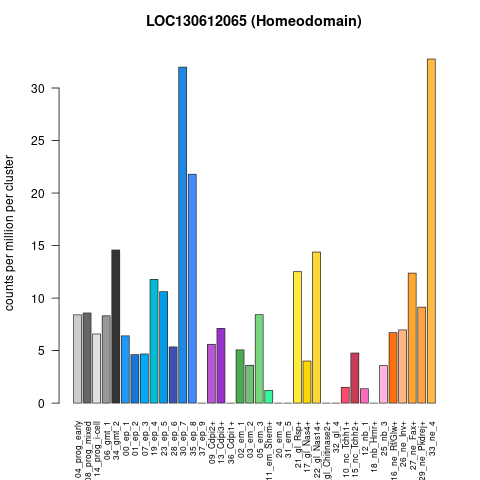

In [ ]:
%%R
SRF_class <- "LOC130612065"
plot_tf_hysim(SRF_class)

## Complexheatmap of the transcription factors

In [ ]:
%%R
hysim_tfs_zsco <-
  t(
    scale(
      t(
        log(hysim_tfs_cpm+2) # we add 2 for visualisation only
        )
      )
    )

In [ ]:
%%R
#Color palette for heatmap of TF-TF Spearman correlation
hysim_tfs_heat_col <- colorRamp2(
  c( # breaks, clipped
    seq(-0.4,0.2,len=10),
    seq(0.3,0.5,len=10)
  ),
  colorRampPalette( # colors
    rev(brewer.pal(7,"RdYlBu"))
  )(20)
)

# Color palette for heatmap of expression
col_hysim_expr_zsco_hm <- colorRamp2(
  c(1:6,6.5), # breaks, clipped
  rev(sequential_hcl(7,"BuPu")) # colors
  )

clu_method <- "ward.D2"

# The Heatmaps themselves
hysim_cor_hm <- Heatmap(
  name="Spearman",
  cor(
    t(na.omit(hysim_tfs_zsco)),
    method="sp" # Spearman correlation
  ),
  clustering_method_columns = clu_method,
  clustering_method_rows = clu_method,
  col=hysim_tfs_heat_col,
  show_row_names = FALSE,
  show_column_names = FALSE
  )

hysim_expr_zsco_hm <- Heatmap(
  name="norm\nexpr",
  na.omit(t(scale(t(hysim_tfs_cpm)))+2), # +2 for visualisation purposes
  col=col_hysim_expr_zsco_hm,
  show_row_names = F,
  show_column_names = F,
  cluster_rows=T,
  #clustering_method_columns = clu_method,
  clustering_method_rows = clu_method,
  cluster_columns=F,
  top_annotation=clu_ha
  )

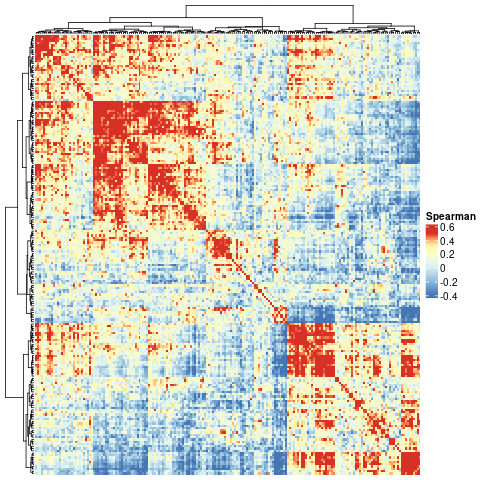

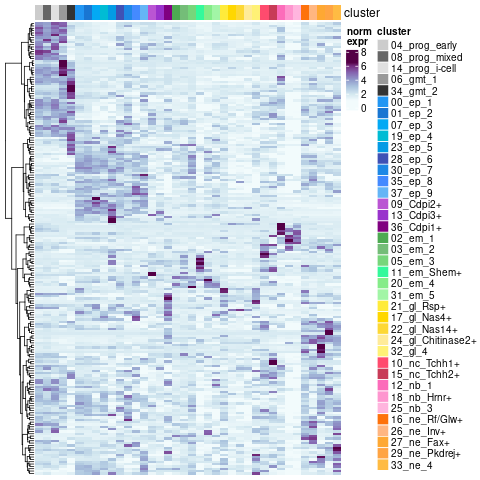

In [ ]:
%%R
draw(hysim_cor_hm) #heatmap of TF vs. Tf Spearmann correlation
draw(hysim_expr_zsco_hm)#heatmap of expression across clusters or broad cell types
#heatmap

The following is to organize the rows of the heatmap according to the average expression in each column

In [ ]:
%%R
## Staircase plot of TFs
highest_val <- function(x){ # x: a vector of named values
  a = x - mean(x)
  b = which(a == max(a) )
  if(length(b) > 1) b = b[1]
  c = names(x)[b]
  return(c)
}
#To do it as a fold change
test <- t(
  apply(
    hysim_tfs_cpm,
    1,
    function(x){
      a = log(x/mean(x))
      a[is.infinite(a)] = 0
      return(a)
    }
  )
)

hysim_tfs_genecol <-
  data.frame(
    id = rownames(test),
    ctype = apply(
      test,
      1,
      highest_val
    )
  )

hysim_tfs_genecol$ctype <- factor(hysim_tfs_genecol$ctype,levels = colnames(hysim_tfs_cpm))

hysim_tfs_genecol <- hysim_tfs_genecol[order(hysim_tfs_genecol$ctype),]

test <- test[match(hysim_tfs_genecol$id,rownames(test)),]

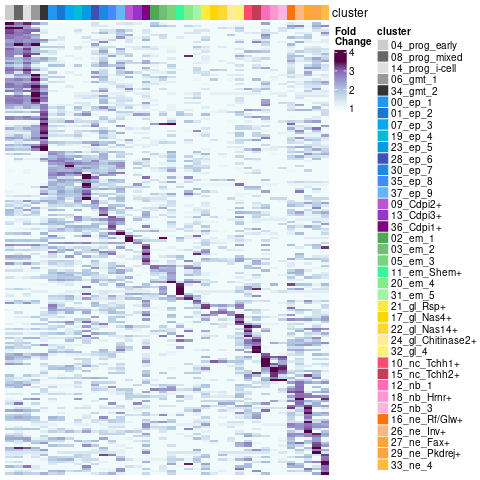

In [ ]:
%%R
#Heatmap with the logfold change of each transcription factor
# Color palette for heatmap of expression
col_hysim_expr_FC_hm <- colorRamp2(
  c(1:3.5,3.5), # breaks, clipped
  rev(sequential_hcl(4,"BuPu")) # colors
  )
#hysim_expr_FC_hm <-
Heatmap(
      name="Fold\nChange",
      na.omit(t(scale(t(test)))+1),
      col=col_hysim_expr_FC_hm,
      show_row_names = F,
      show_column_names = F,
      cluster_rows=F,
      clustering_method_rows = clu_method,
      cluster_columns=F,
      top_annotation=clu_ha
  )

In [ ]:
%%R
hysim_tfs_genecol <-
  data.frame(
    id = rownames(hysim_tfs_cpm),
    ctype = apply(
      hysim_tfs_cpm,
      1,
      highest_val
    )
  )

hysim_tfs_genecol$ctype <- factor(hysim_tfs_genecol$ctype,levels = colnames(hysim_tfs_cpm))

hysim_tfs_genecol <- hysim_tfs_genecol[order(hysim_tfs_genecol$ctype),]

test <- test[match(hysim_tfs_genecol$id,rownames(test)),]

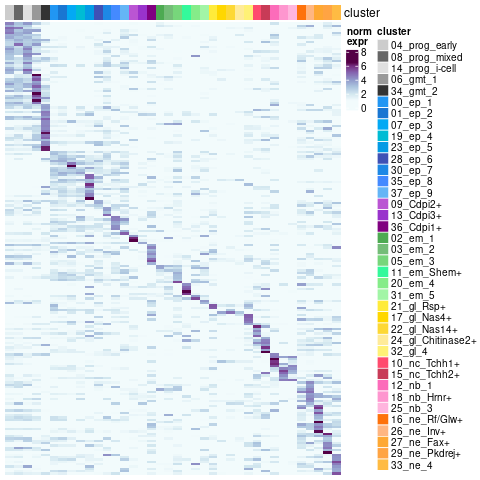

In [ ]:
%%R
#Starcase heatmap with the normalised cpm expression values of each transcription factor
Heatmap(
      name="norm\nexpr",
      na.omit(t(scale(t(hysim_tfs_cpm)))+1),
      col=col_hysim_expr_zsco_hm,
      show_row_names = F,
      show_column_names = F,
      cluster_rows=F,
      cluster_columns=F,
      top_annotation=clu_ha,
      row_order= (rownames(hysim_tfs_genecol))
  )

In [ ]:
%%R
pdf(
  paste0(
   "./",
    fcha(),
    "_hysim_tfs_cor_spear.pdf"
  ),
  he = 10,
  wi = 14
)
draw(hysim_cor_hm)
dev.off()

Now to highlight the row names we want we make a small function

In [ ]:
%%R
highlight_rows_gp <- function(row_names, highlighted_rows, default_gp, highlight_gp) {
  gp_list <- lapply(row_names, function(row_name) {
    if (row_name %in% highlighted_rows) {
      return(highlight_gp)
    } else {
      return(default_gp)
    }
  })
  return(gp_list)
}

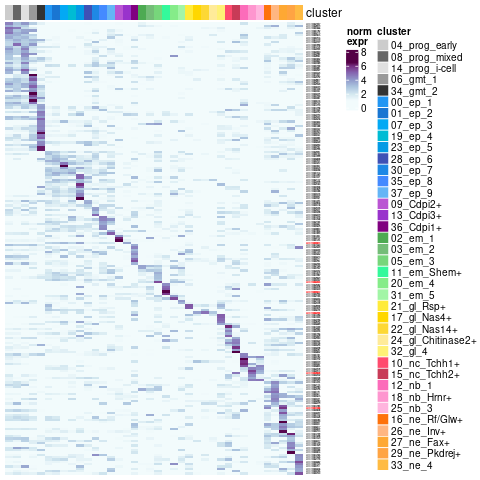

In [ ]:
%%R
#Staircase heatmap highlighting a set of rows
my_tfs <- c('LOC130655813', 'LOC130655612', 'LOC130662634',
            'LOC130662355', 'LOC130628828', 'LOC130613068')

# Function to define the graphical parameters for row names
highlight_rows_gp <- function(row_names, highlighted_rows) {
  gpar(
    fontsize = ifelse(row_names %in% highlighted_rows, 2.5, 2.5),
    col = ifelse(row_names %in% highlighted_rows, "red", "black"),
    fontface = ifelse(row_names %in% highlighted_rows, "bold", "plain")
  )
}

hysim_expr_zsco_hm <- Heatmap(
      name="norm\nexpr",
      na.omit(t(scale(t(hysim_tfs_cpm)))+1),
      col=col_hysim_expr_zsco_hm,
      show_row_names = T,
      show_column_names = F,
      cluster_rows=F,
      cluster_columns=F,
      top_annotation=clu_ha,
      row_order= (rownames(hysim_tfs_genecol)),
      row_names_gp = highlight_rows_gp(row_names = rownames(hysim_tfs_cpm), highlighted_rows = my_tfs)
  )

draw(hysim_expr_zsco_hm)

In [ ]:
%%R
pdf(
  paste0(
   "./",
    fcha(),
    "_hysim_tfs_clusters_with_annotation_diagonal.pdf"
  ),
  he = 10,
  wi = 14
)
draw(hysim_expr_zsco_hm)
dev.off()

png 
  2 


# Analysis of transcription factors at the class level

In [ ]:
%%R
# boxplot CV per TF class

hysim_tfs_class_cv <- merge(
  data.frame(
    id = hysim_tfs$id,
    class = factor(
      hysim_tfs$class,
      levels = unique(hysim_tfs$class)
      )
    ),
  data.frame(
    id = rownames(hysim_tfs_cpm),
    cv = apply(
      hysim_tfs_cpm[,1:38],
      1,
      function(x){
        sd(x)/mean(x)
      }
    )
  ),
  by = 1
)[,2:3]

head(hysim_tfs_class_cv)

        class        cv
1 Homeodomain 1.0318810
2         ETS 1.5704080
3         MYB 0.5158234
4     zf_C2H2 2.2911810
5         MYB 0.8135236
6     zf_C2H2 0.7209146


In [ ]:
%%R
tfs_cv_scatter <-
  ggplot(hysim_tfs_class_cv %>% group_by(class) %>%
           dplyr::mutate(med = median(cv)) %>%
           dplyr::mutate(numgenes = log(table(as.character(class)))),
         aes(x = numgenes, y = med, label=class)) +
  geom_text(hjust=0, vjust=0, aes(colour = class))+
  scale_color_manual(
    values = rainbow(length(levels(hysim_tfs_class_cv$class)))
    )+
  theme_classic()

Scatter plot of the coeficient variation per number of genes of each TF class

Don't know how to automatically pick scale for object of type <table>.
Defaulting to continuous.


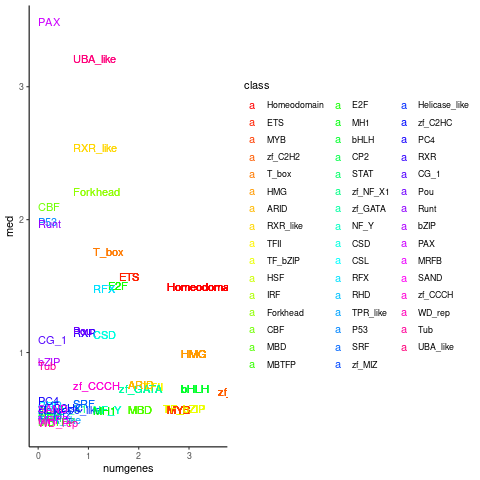

In [ ]:
%%R
tfs_cv_scatter

In [ ]:
%%R
tfs_cv_boxplot <-
  ggplot(hysim_tfs_class_cv %>% group_by(class) %>%
           dplyr::mutate(med = median(cv)) %>%
           dplyr::mutate(numgenes = log(table(as.character(class)))),
         aes(x = reorder(class, cv, FUN=median), y = cv)) +
  geom_boxplot(aes(fill = numgenes))+
  scale_fill_gradient(low="#00204D", high="#FFEA46")+
  theme_classic()+
  theme(
    axis.text.x = element_text(
      colour = rainbow(length(levels(hysim_tfs_class_cv$class))),
      angle = 90
      )
   )

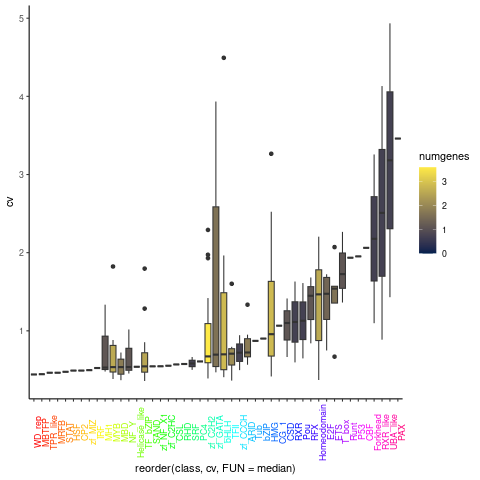

In [ ]:
%%R
tfs_cv_boxplot

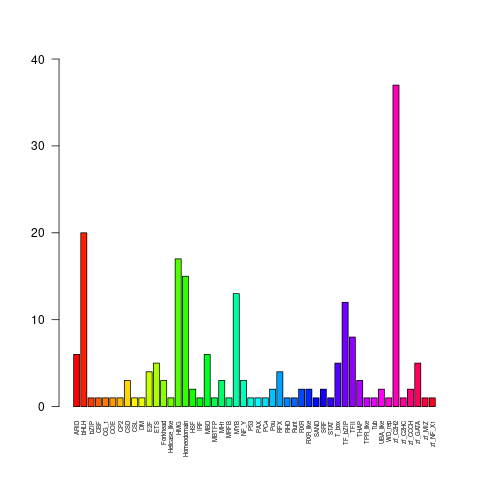

In [ ]:
%%R
barplot(
  table(hysim_tfs$class),
  col = rainbow(length(unique(sort(hysim_tfs$class)))), # give them proper coloring like above
  las = 2,
  cex.names = 0.5,
  ylim = c(0,40)
  )

In [ ]:
%%R
##sorting main classes alfabetically
hysim_tfs_mainclasses <-
  names(
    table(hysim_tfs$class)[
      table(hysim_tfs$class) >= 5
      ]
    )
hysim_tfs_mainclasses <- sort(hysim_tfs_mainclasses) # sort alphabetically
hysim_tfs_mainclasses

 [1] "ARID"        "bHLH"        "ETS"         "HMG"         "Homeodomain"
 [6] "MBD"         "MYB"         "T_box"       "TF_bZIP"     "TFII"       
[11] "zf_C2H2"     "zf_GATA"    


In [ ]:
%%R
(table(hysim_tfs$class))


         ARID          bHLH          bZIP           CBF          CG_1 
            6            20             1             1             1 
          COE           CP2           CSD           CSL            DM 
            1             1             3             1             1 
          E2F           ETS      Forkhead Helicase_like           HMG 
            4             5             3             1            17 
  Homeodomain           HSF           IRF           MBD         MBTFP 
           15             2             1             6             1 
          MH1          MRFB           MYB          NF_Y           P53 
            3             1            13             3             1 
          PAX           PC4           Pou           RFX           RHD 
            1             1             2             4             1 
         Runt           RXR      RXR_like          SAND           SRF 
            1             2             2             1             2 
     

# Visualizing TF class prevalence across cell types

In [ ]:
%%R
hysim_tfs_cpm_topclass <-
  merge(
    hysim_tfs_cpm,
    hysim_tfs,
    by.x = 0,
    by.y = 1,
  ) %>%
  column_to_rownames("Row.names") %>%
  filter(class %in% hysim_tfs_mainclasses)

head(hysim_tfs_cpm_topclass)

             04_prog_early 08_prog_mixed 14_prog_i-cell   06_gmt_1  34_gmt_2
LOC130612065       8.40768      8.581125       6.583068   8.314072  14.57705
LOC130612084      22.53258     22.883001       8.777423  19.399502  14.57705
LOC130612125     272.74513    207.377193     308.087562 202.309095 189.50161
LOC130612189      24.55042     31.464126      11.410650   2.771357  14.57705
LOC130612234      80.71372    101.543315      75.046970  56.350935  14.57705
LOC130612244      33.96703     27.173563      53.981154  34.180075  43.73114
                00_ep_1    01_ep_2   07_ep_3    19_ep_4   23_ep_5    28_ep_6
LOC130612065   6.408038   4.623649  4.678946  11.774652  10.61515   5.349453
LOC130612084  21.787330  13.870948  9.357893   4.709861  34.49923   5.349453
LOC130612125 184.551501 173.564677 69.404370 146.005685 116.76663 149.784685
LOC130612189   7.048842   2.845323  3.119298   7.064791  13.26893  10.698906
LOC130612234  32.040191  32.009879 32.752624  65.938051  10.61515  74.892342

In [ ]:
%%R
hysim_tfs_ngenes <-
  apply(
    hysim_tfs_cpm_topclass[1:38],
    2,
    function(x){ ifelse(x > 0, 1, 0) }
    )
row.names(hysim_tfs_ngenes) <- hysim_tfs_cpm_topclass$class

hysim_tfs_ngenes <-
  aggregate(
    hysim_tfs_ngenes[, 1:38],
    by = list(Category = rownames(hysim_tfs_ngenes)),
    FUN = sum) %>%
  arrange(Category) %>%
  column_to_rownames("Category")

In [ ]:
%%R
hysim_tfs_expgenes <-
  aggregate(
    hysim_tfs_cpm_topclass[, 1:38],
    by = list(Category = hysim_tfs_cpm_topclass$class),
    FUN = sum) %>%
  arrange(Category) %>%
  column_to_rownames("Category")

In [ ]:
%%R
hysim_tfs_expngenes <-
  hysim_tfs_expgenes / hysim_tfs_ngenes
hysim_tfs_expngenes <- apply(hysim_tfs_expngenes, 2, function(x){ifelse(is.nan(x),0,x)})

hysim_tf_EXPNGEN <-
  apply(hysim_tfs_expngenes, 2, function(x) {
    x / sum(x)
  })

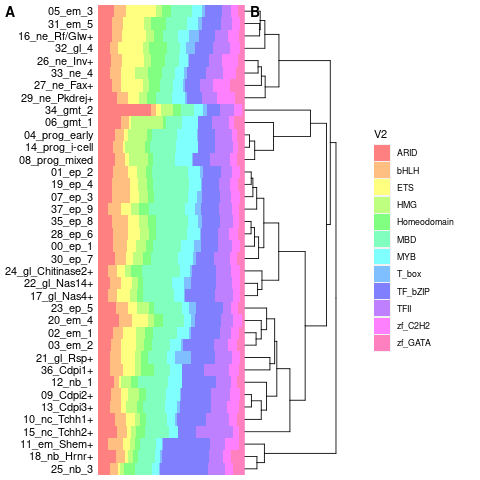

In [ ]:
%%R
barplot_cluster(t(hysim_tf_EXPNGEN))